In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import kagglehub
from scipy import stats

path = kagglehub.dataset_download("altavish/boston-housing-dataset", path="HousingData.csv")

In [2]:
df = pd.read_csv(path)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
# Check will are the NaN cols
df.columns[df.isna().any()].tolist()

['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']

In [4]:
df.fillna({
    'CRIM': df['CRIM'].median()
}, inplace=True)

In [5]:
# Identify outliers in the number of rooms feature (Boston Housing dataset) using IQR.

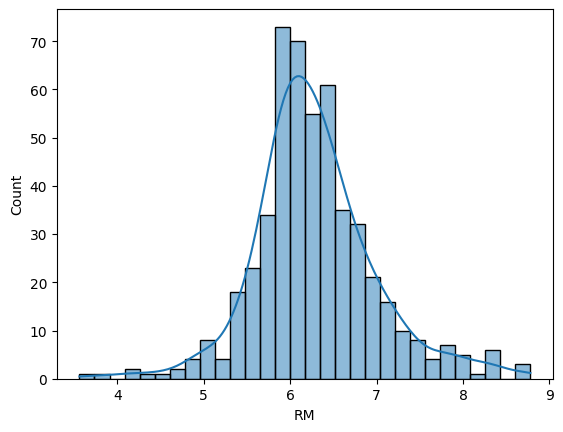

In [6]:
sns.histplot(df['RM'], bins = 30, kde = True)
plt.show() # It is

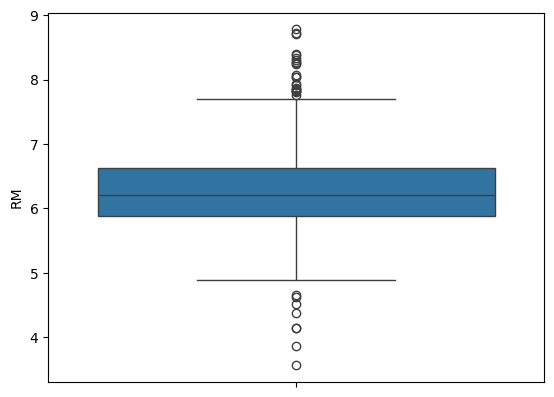

In [7]:
# Box plot to vis. outliers
sns.boxplot(df['RM'])
plt.show()

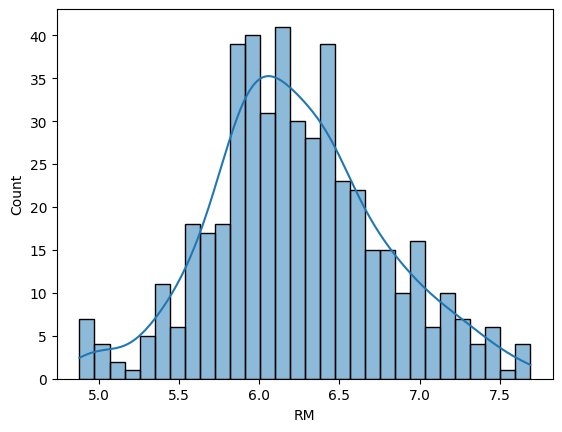

In [8]:
Q1 = df['RM'].quantile(0.25)
Q3 = df['RM'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_rooms_without_outliers = df[(df['RM'] >= lower_bound) & (df['RM'] <= upper_bound)]


# re-plot hist
sns.histplot(df_rooms_without_outliers['RM'], bins=30, kde=True)
plt.show()

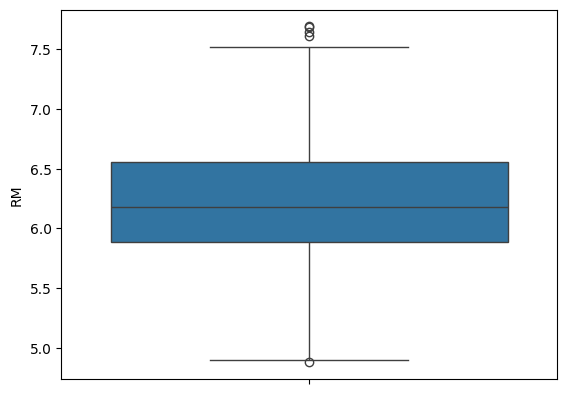

In [9]:
# Box plot to vis. outliers
sns.boxplot(df_rooms_without_outliers['RM'])
plt.show()

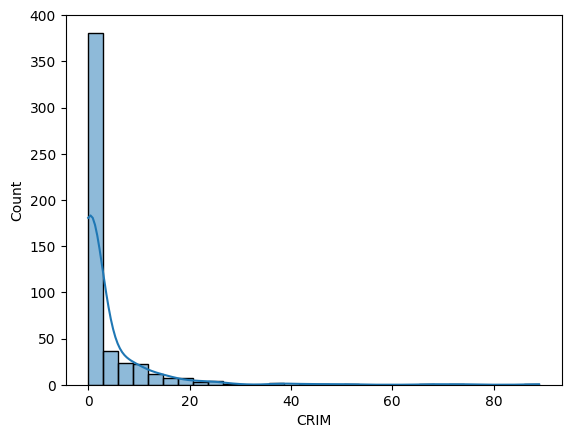

In [18]:
# Task: Use the Z-score method to detect extreme outliers in crime rate (Boston Housing dataset).

sns.histplot(df['CRIM'], bins = 30, kde = True)
plt.show()

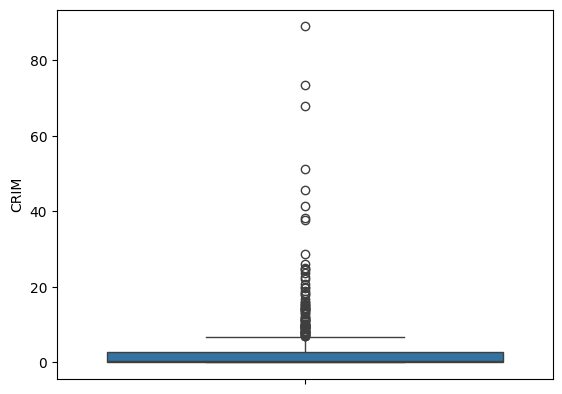

In [20]:
sns.boxplot(df['CRIM'])
plt.show()

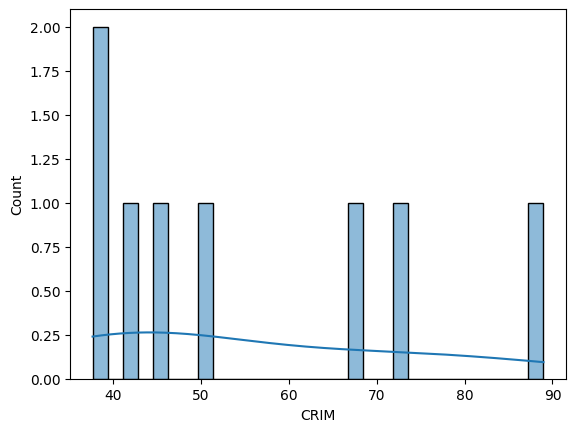

In [28]:
import numpy as np

df['CRIM_Z_SCORE'] = stats.zscore(df['CRIM'])
outliers = df[np.abs(df['CRIM_Z_SCORE']) > 3]

# PLotting outlier
sns.histplot(outliers['CRIM'], bins=30, kde = True)
plt.show()

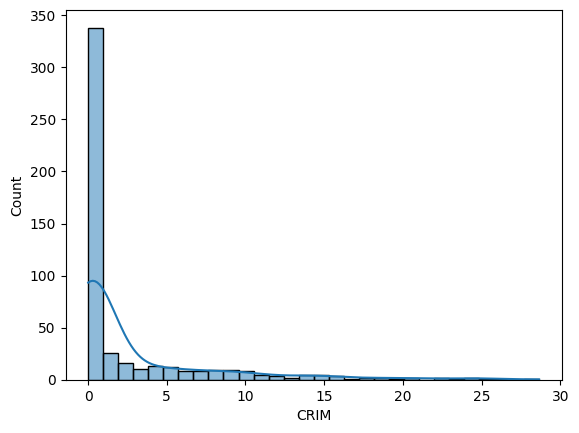

In [33]:
# Plotting after remoing outlier
df_without_crim_outliers = df[np.abs(df['CRIM_Z_SCORE']) < 3]

sns.histplot(df_without_crim_outliers['CRIM'], bins=30, kde = True)
plt.show()

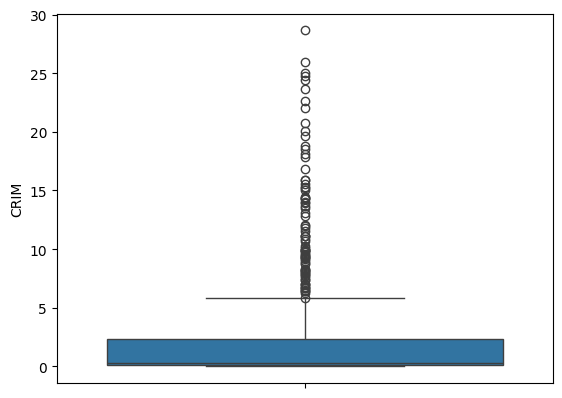

In [34]:
sns.boxplot(df_without_crim_outliers['CRIM'])
plt.show()